# Santos Buoy - Quality Control Analysis

## Import libs

In [68]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest

import matplotlib.pyplot as plt
import seaborn as sns

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import os
os.chdir('/home/remobs-dados/PNBOIA/pnboia_qc/pnboia_qc')
import pnboia_limits_tests
from lims_gen import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [43]:
data_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'
os.chdir(data_path)

In [49]:
# Data
buoys_df_raw = pd.read_csv('pnboia_raw_data.csv',parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.rename(columns={'humi':'rh', # variables temporarily renamed to match QCChecks limits naming
                        'dewp':'dewpt',
                        'wtmp':'sst',
                        'cvel1':'cspd1',
                        'cvel2':'cspd2',
                        'cvel3':'cspd3',
                        'wvht':'swvht',
                        'wmax':'mxwvht',
                        'dpd':'tp',
                        'mwd':'wvdir',
                        'spred':'wvspread'}, inplace=True)
buoys_df_raw.drop(columns=['lat','lon'],inplace=True)

names = {'cf':'cabofrio',
        'cf2':'cabofrio2',
        'fo':'fortaleza',
        'it':'itajai_0',
        'ni':'niteroi',
        'po':'porto_seguro', 
        're':'recife',
        'rg':'rio_grande', 
        'sa':'santos', 
        'vi':'vitoria'}


buoys_df_raw['buoy'] = buoys_df_raw['buoy'].replace(names)
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# Limits from pnboia_limits_tests.py
santos_lims = pnboia_limits_tests.santos

## Statistical Analysis

In [50]:
santos = buoys_df_raw.loc['santos']

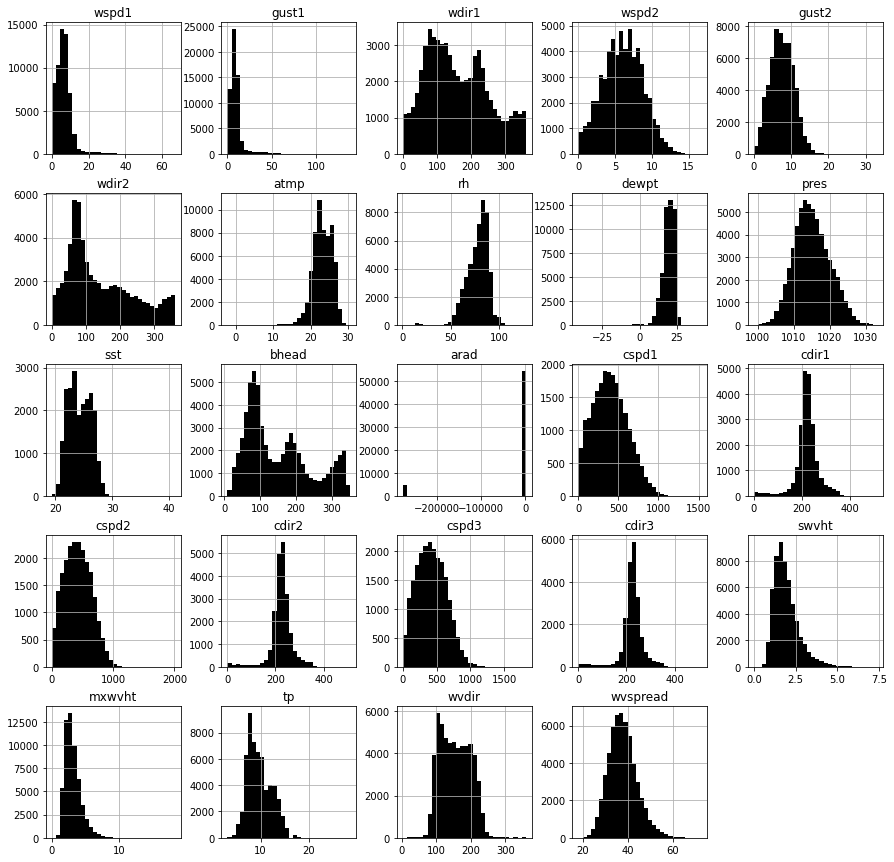

In [67]:
santos.drop(columns='battery').hist(figsize=(15,15),bins=30,color='k');

In [73]:
data_test

0        4.1
1        5.1
2        6.1
3        6.4
4        4.5
        ... 
59490    6.0
59491    5.5
59492    4.6
59493    4.1
59494    NaN
Name: wspd1, Length: 59495, dtype: float64

TypeError: text() missing 3 required positional arguments: 'x', 'y', and 's'

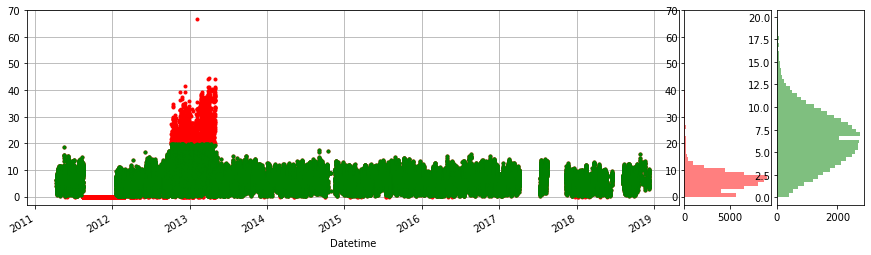

In [122]:
param = 'wspd1'

fig, ax = plt.subplots(1,3,sharey=False, figsize=(15,4),gridspec_kw={'width_ratios': [3, 0.4, 0.4]})
plt.subplots_adjust(wspace=0.02)

santos[param].plot(ls='None', marker='.', color='red', grid=True, ax=ax[0])
santos1[param].plot(ls='None', marker='.', color='green', grid=True, ax=ax[0])

ax[1].hist(santos[param], color='red', alpha=0.5, bins=50, orientation='horizontal');
ax[2].hist(santos1[param], color='green', alpha=0.5, bins=50, orientation='horizontal');


ax[0].text()

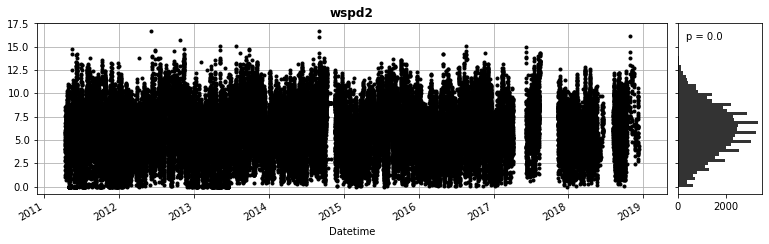

In [148]:
param = 'wspd2'

fig, ax = plt.subplots(1,2,sharey=True, figsize=(13,3.5),gridspec_kw={'width_ratios': [3, 0.4]})
plt.subplots_adjust(wspace=0.03)

santos[param].plot(ls='None', marker='.', color='k', grid=True, ax=ax[0])
ax[1].hist(santos[param], color='k',bins=50, orientation='horizontal',alpha=0.8);

# norm_test = normaltest(santos[param].values,nan_policy='omit')
# norm_test_str = f"p = {norm_test[1].round(10)}"

ax[1].annotate(norm_test_str,xy=(0.1,0.9),xycoords='axes fraction')

ax[0].set_title(f"{param}", weight='bold');

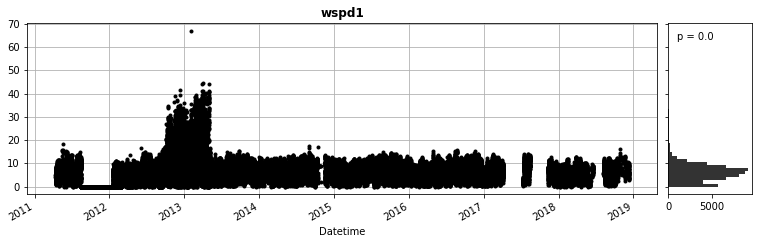

In [150]:
param = 'wspd1'

fig, ax = plt.subplots(1,2,sharey=True, figsize=(13,3.5),gridspec_kw={'width_ratios': [3, 0.4]})
plt.subplots_adjust(wspace=0.03)

santos[param].plot(ls='None', marker='.', color='k', grid=True, ax=ax[0])
ax[1].hist(santos[param], color='k',bins=50, orientation='horizontal',alpha=0.8);

norm_test = normaltest(santos[param].values,nan_policy='omit')
norm_test_str = f"p = {norm_test[1].round(10)}"

ax[1].annotate(norm_test_str,xy=(0.1,0.9),xycoords='axes fraction')

ax[0].set_title(f"{param}", weight='bold');

In [115]:
normaltest(santos['wspd1'].values,nan_policy='omit')

NormaltestResult(statistic=29481.709659625674, pvalue=0.0)

## Tests

In [111]:
# Generated lims
santos_out_lims_df_1 = gen_outlier_lim(buoys_df_raw,std_factor=3).loc['santos']

# Generate lims dict
santos_out_lims_dict_1 = manual_outlier_lims('santos',santos_out_lims_df_1)

# filter data with
santos1 = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    range_axys_limits=santos_out_lims_dict_1)

mis_value_check done.
range_check done.
range_check_climate done.


In [52]:
# Generated lims
santos_out_lims_df_2 = gen_outlier_lim(buoys_df_raw,std_factor=2).loc['santos']

# Generate lims dict
santos_out_lims_dict_2 = manual_outlier_lims('santos',santos_out_lims_df_2)

# filter data with
santos2 = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    range_axys_limits=santos_out_lims_dict_2)

mis_value_check done.
range_check done.
range_check_climate done.


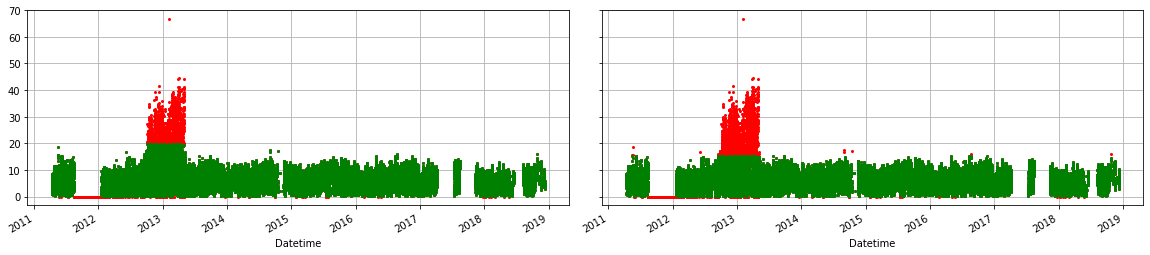

In [152]:
buoy = 'santos'
param = 'wspd1'
fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(20,4))
plt.subplots_adjust(wspace=0.06)

# test1
buoys_df_raw.loc[buoy,param].plot(color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);
santos1[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);

# test2
buoys_df_raw.loc[buoy,param].plot(color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);
santos2[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);

In [40]:
santos.index

Index(['2011-04-12 19:00:00', '2011-04-12 20:00:00', '2011-04-12 21:00:00',
       '2011-04-12 22:00:00', '2011-04-12 23:00:00', '2011-04-13 00:00:00',
       '2011-04-13 01:00:00', '2011-04-13 02:00:00', '2011-04-13 03:00:00',
       '2011-04-13 04:00:00',
       ...
       '2018-12-09 00:00:00', '2018-12-09 01:00:00', '2018-12-09 02:00:00',
       '2018-12-09 03:00:00', '2018-12-09 04:00:00', '2018-12-09 05:00:00',
       '2018-12-09 06:00:00', '2018-12-09 07:00:00', '2018-12-09 08:00:00',
       '2018-12-09 09:00:00'],
      dtype='object', name='Datetime', length=59495)

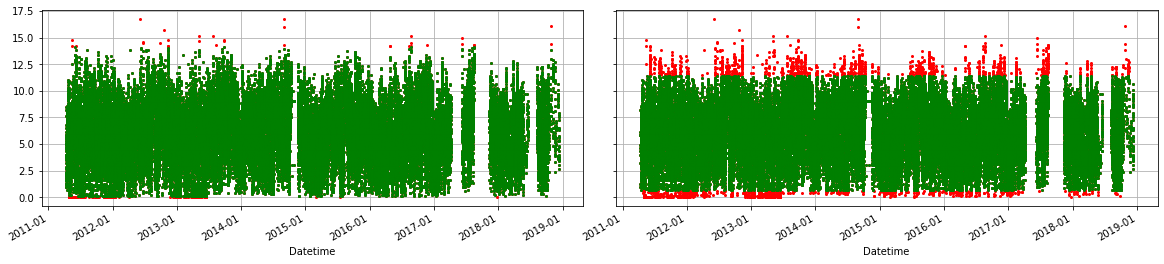

In [65]:
buoy = 'santos'
param = 'wspd2'
fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(20,4))
plt.subplots_adjust(wspace=0.06)

# test1
buoys_df_raw.loc[buoy,param].plot(color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);
santos1[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);

# test2
buoys_df_raw.loc[buoy,param].plot(color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);
santos2[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);

import matplotlib.dates as mdates
dates_format = mdates.DateFormatter('%Y-%m')
ax[0].xaxis.set_major_formatter(dates_format)

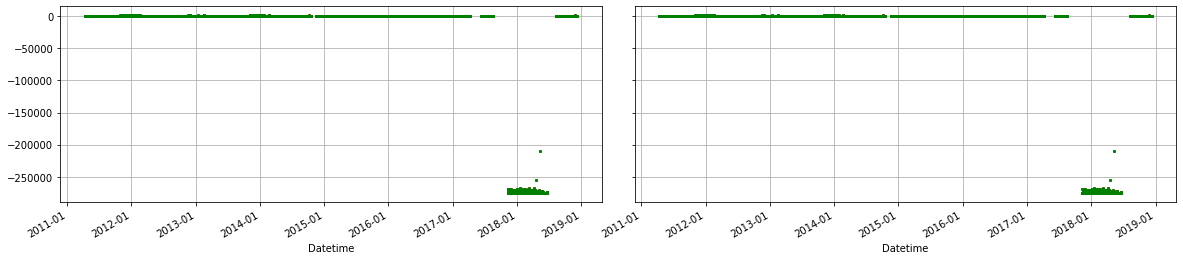

In [66]:
buoy = 'santos'
param = 'arad'
fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(20,4))
plt.subplots_adjust(wspace=0.06)

# test1
buoys_df_raw.loc[buoy,param].plot(color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);
santos1[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);

# test2
buoys_df_raw.loc[buoy,param].plot(color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);
santos2[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);

import matplotlib.dates as mdates
dates_format = mdates.DateFormatter('%Y-%m')
ax[0].xaxis.set_major_formatter(dates_format)

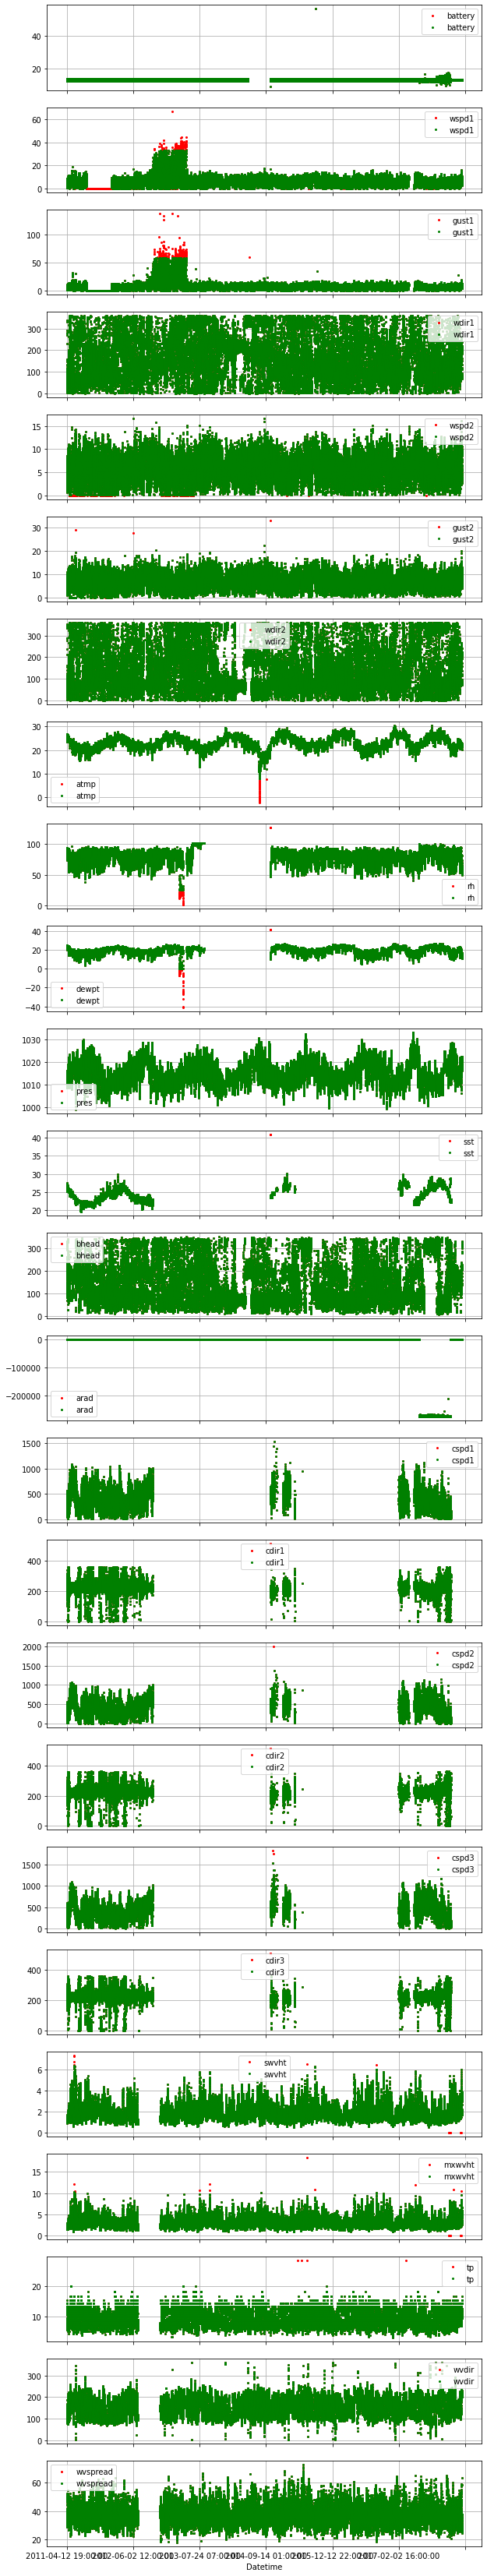

In [13]:
buoy = 'santos'
params_raw = buoys_df_raw.loc[buoy].columns
fig, ax = plt.subplots(len(params_raw),1,sharex=True,figsize=(10,60))
buoys_df_raw.loc[buoy,params_raw].plot(subplots=True,color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax);
santos.plot(subplots=True,color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax);

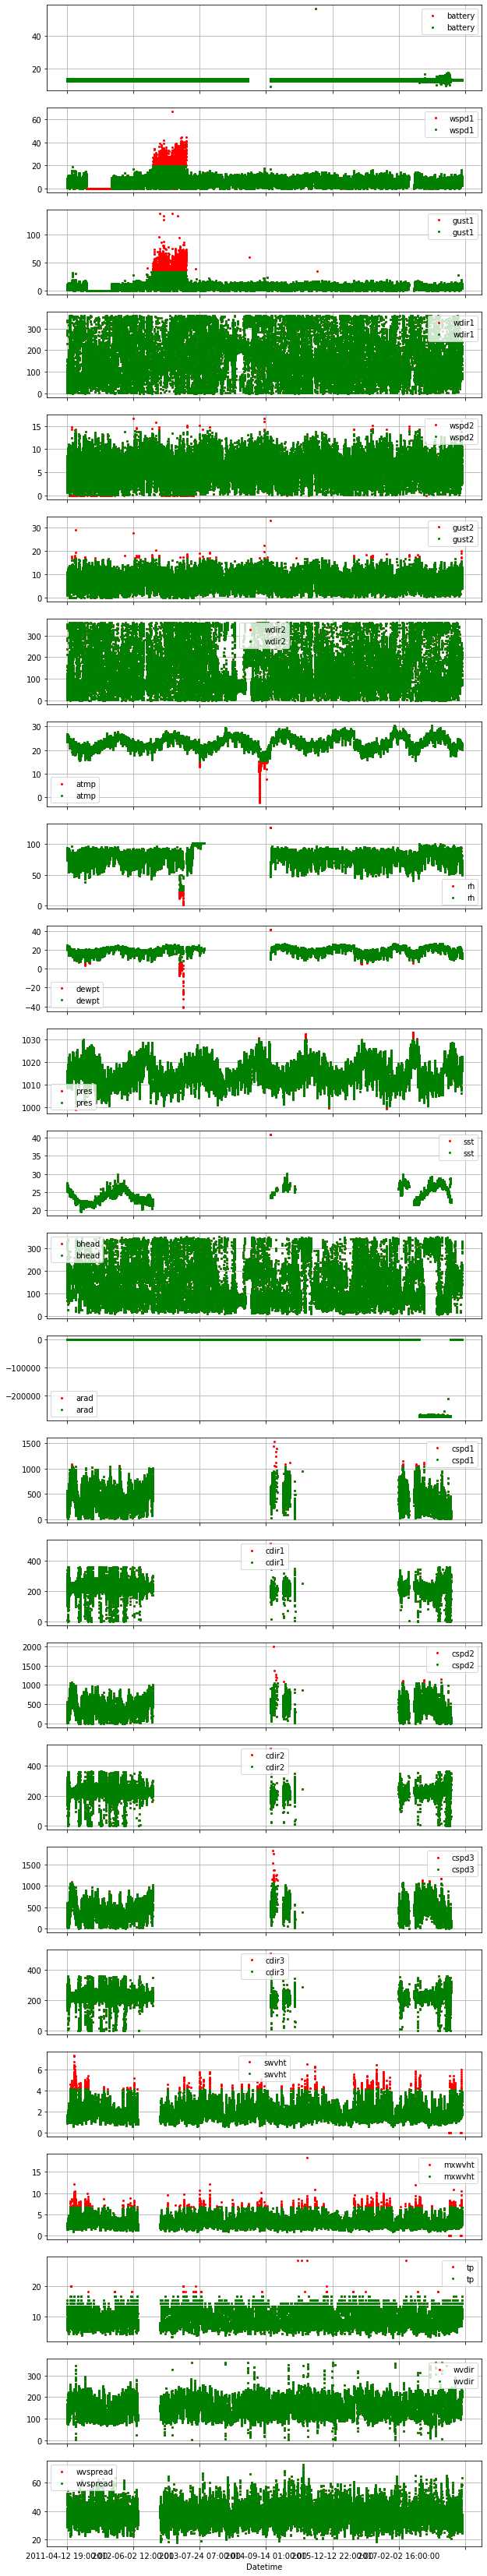

In [27]:
buoy = 'santos'
params_raw = buoys_df_raw.loc[buoy].columns
fig, ax = plt.subplots(len(params_raw),1,sharex=True,figsize=(10,60))
buoys_df_raw.loc[buoy,params_raw].plot(subplots=True,color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax);
santos.plot(subplots=True,color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax);